In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_excel('C:\\Users\\elisa\\OneDrive - GENES\\Documents\\GitHub\\Projet-Python-pour-le-Data-Scientist\\base_a_traiter.xlsx')

In [4]:
df.head()

,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,Air France,0,Oslo,1344.0,2022-04-01,2022-04-08,204,2.333333
1,Air France,0,Oslo,1344.0,2022-04-01,2022-04-08,204,2.500000
2,Flyr AS,0,Oslo,1344.0,2022-04-01,2022-04-08,195,2.416667
3,Flyr AS,0,Oslo,1344.0,2022-04-01,2022-04-08,195,2.416667
4,Norwegian,0,Oslo,1344.0,2022-04-01,2022-04-08,186,2.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61334 entries, 0 to 61333
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Compagnie        61319 non-null  object        
 1   Total d'escales  61334 non-null  int64         
 2   Destination      61334 non-null  object        
 3   Distance         61334 non-null  float64       
 4   Date_aller       61334 non-null  datetime64[ns]
 5   Date_retour      61334 non-null  datetime64[ns]
 6   Prix             61334 non-null  int64         
 7   Duree de vol     61334 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 3.7+ MB


### Chiffres généraux

In [7]:
df.describe()

,Total d'escales,Distance,Prix,Duree de vol
count,73278.000000,73278.000000,73278.000000,73278.000000
mean,0.516076,1281.930674,278.167663,4.469546
std,0.520924,667.682119,312.885063,2.962306
min,0.000000,342.760000,33.000000,1.083333
25%,0.000000,1054.000000,148.000000,2.083333
50%,1.000000,1054.000000,203.000000,4.000000
75%,1.000000,2095.520000,308.000000,6.000000
max,2.000000,2486.340000,5355.000000,28.250000


### Matrice de corrélation

<AxesSubplot:>

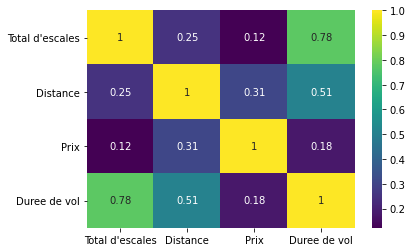

In [8]:
sns.heatmap(df.corr(), cmap= sns.color_palette("viridis", as_cmap=True), annot = True)

### Caractérisation de chaque destination en fonction des variables quantitatives

1. Diagramme en barre

In [40]:
df_moyen= df.groupby(['Destination']).mean()

In [41]:
df_moyen

,Total d'escales,Distance,Prix,Duree de vol
Destination,,,,
Athenes,0.742656,2095.52,287.960344,6.443462
Londres,0.350297,342.76,173.448249,2.475336
Madrid,0.400604,1054.00,252.368457,3.729129
Moscou,0.665254,2486.34,571.197088,7.051030
Oslo,0.768169,1344.00,212.073108,5.222225


In [10]:
df_moyen['Destination']=['Athenes','Londres','Madrid','Moscou','Oslo']

Diagramme à barre des prix moyens de chaque destination

<AxesSubplot:xlabel='Destination', ylabel='Prix'>

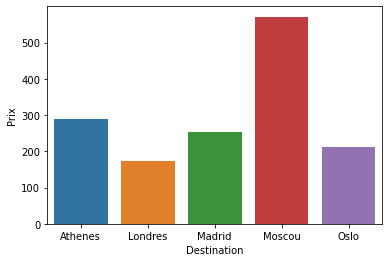

In [11]:
sns.barplot(x="Destination", y="Prix", data=df_moyen)

2. Comparaison globale

In [59]:
df_moyen= df.groupby(['Destination']).mean()

In [60]:
df_moyen

,Total d'escales,Distance,Prix,Duree de vol
Destination,,,,
Athenes,0.742656,2095.52,287.960344,6.443462
Londres,0.350297,342.76,173.448249,2.475336
Madrid,0.400604,1054.00,252.368457,3.729129
Moscou,0.665254,2486.34,571.197088,7.051030
Oslo,0.768169,1344.00,212.073108,5.222225


In [61]:
df_moyen.loc['Paris']=[0.001,0.001,0.001,0.001]

In [62]:
from sklearn import preprocessing

x = df_moyen.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_moyen= pd.DataFrame(x_scaled)

In [63]:
df_moyen.columns = ["Total d'escales","Distance","Prix","Duree de vol"]
df_moyen.rename(index={0: 'Athenes',1:'Londres',2:'Madrid',3:'Moscou',4:'Oslo',5:'Paris' }, inplace=True)

In [75]:
df_moyen #On a normalisé les valeursde 0 à 1 avec comme point initial Paris

,Total d'escales,Distance,Prix,Duree de vol
Athenes,0.966744,0.842813,0.504134,0.913821
Londres,0.455306,0.137857,0.303656,0.350968
Madrid,0.520881,0.423916,0.441823,0.528810
Moscou,0.865851,1.000000,1.000000,1.000000
Oslo,1.000000,0.540553,0.371277,0.740596
Paris,0.000000,0.000000,0.000000,0.000000


In [65]:
df_moyen_transposed= df_moyen.T

In [66]:
df_moyen_transposed

,Athenes,Londres,Madrid,Moscou,Oslo,Paris
Total d'escales,0.966744,0.455306,0.520881,0.865851,1.000000,0.0
Distance,0.842813,0.137857,0.423916,1.000000,0.540553,0.0
Prix,0.504134,0.303656,0.441823,1.000000,0.371277,0.0
Duree de vol,0.913821,0.350968,0.528810,1.000000,0.740596,0.0


In [70]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'polar'}]])

fig.add_trace(go.Scatterpolar(
        r = list(df_moyen_transposed['Athenes'])+ [list(df_moyen_transposed['Athenes'])[0]],
        theta = list(df_moyen_transposed.index)+["Total d'escales"],
        name = "Athènes"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_moyen_transposed['Londres'])+ [list(df_moyen_transposed['Londres'])[0]],
        theta = list(df_moyen_transposed.index)+["Total d'escales"],
        name = "Londres"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_moyen_transposed['Madrid'])+ [list(df_moyen_transposed['Madrid'])[0]],
        theta = list(df_moyen_transposed.index)+["Total d'escales"],
        name = "Madrid"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_moyen_transposed['Moscou'])+ [list(df_moyen_transposed['Moscou'])[0]],
        theta = list(df_moyen_transposed.index)+["Total d'escales"],
        name = "Moscou"
        ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = list(df_moyen_transposed['Oslo'])+ [list(df_moyen_transposed['Oslo'])[0]],
        theta = list(df_moyen_transposed.index)+["Total d'escales"],
        name = "Oslo"
        ), 1, 1)
fig.show()

### Evolution selon les périodes

### Caractérisation des compagnies

In [72]:
df_compagnie= df.groupby(['Compagnie']).mean()

In [73]:
df_compagnie= df_compagnie.sort_values(by = 'Prix')

In [78]:
df_compagnie['Compagnie']=list(df_compagnie.index)

<AxesSubplot:xlabel='Compagnie', ylabel='Prix'>

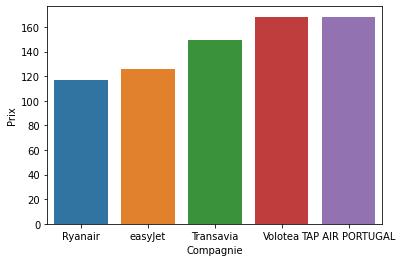

In [82]:
sns.barplot(x="Compagnie", y="Prix", data=df_compagnie[:5])

<AxesSubplot:xlabel='Compagnie', ylabel='Prix'>

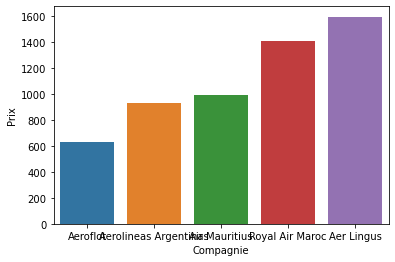

In [83]:
sns.barplot(x="Compagnie", y="Prix", data=df_compagnie[38:])